In [79]:
import re
import os
import pathlib
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import gridspec
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set_theme(style="darkgrid")

# Root of the project
project_dir = pathlib.Path().resolve().parent

# Directory containing experiment results
results_dir = (pathlib.Path(project_dir) / "results").resolve()

# Directory for tidied data (output directory)
data_dir = (pathlib.Path(project_dir) / "data").resolve()

# Directory to store all plots
plot_dir = (pathlib.Path(project_dir) / "plots").resolve()

In [80]:
"""Load cleaned/aggregated data sets

Also fixes type hinting for pandas

resource_df -> CPU/Mem utilization for experiments
fortio_df -> Load test results from fortio
"""

resource_df = pd.read_csv(
    data_dir / "resource_results.csv",
    dtype={
        # "experiment": "category",
        # "mesh": "category",
        # "requested_qps": "category",
        "pod": "string",
        "container": "string",
    },
    parse_dates=["date"],
)


fortio_df = pd.read_csv(
    data_dir / "fortio_results.csv",
    dtype={
        # "experiment": "category",
        # # "mesh": "category",
        # "requested_qps": "category",
        # "protocol": "category",
        # "payload": "category",
        "actual_qps": "float64",
        "start": "float64",
        "end": "float64",
        "count": "uint64",
    },
    parse_dates=["date"],
)

In [81]:
df = fortio_df[fortio_df["experiment"] == "01_http_max_throughput"]

df = df[["mesh", "actual_qps"]].drop_duplicates()
df = df.sort_values(by="actual_qps", ascending=False)
df = df.reset_index(drop=True)
df

,mesh,actual_qps
0,Baseline,21652.916972
1,Cilium,18009.233443
2,Linkerd,9756.589185
3,Istio,4324.863928
4,Traefik,565.807761


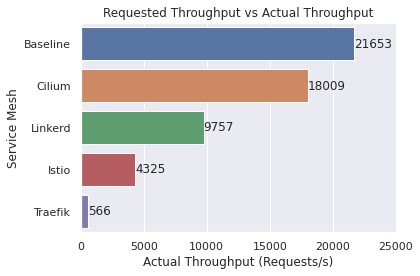

In [82]:
"""
Chart to show the average throughput
"""

fig, ax = plt.subplots()
ax = sns.barplot(data=df, x="actual_qps", y="mesh", ax=ax)

ax.set_xlim(0, 25000)


# # Show numbers on top of bars
ax.bar_label(ax.containers[0], label_type="edge", fmt="%.0f")

ax.set_xlabel("Actual Throughput (Requests/s)")
ax.set_ylabel("Service Mesh")
ax.set_title("Requested Throughput vs Actual Throughput")


fig.tight_layout()
fig.savefig(plot_dir / "exp-01_maximum_throughput_bar.pdf")
